<b><font size=4> When do songs go viral? - Czynniki wpływające na pozycję utworu w rankingu Spotify „Weekly Top Songs Global” </b>
    <br>
<br><font size=2> Model ma na celu wyłonienie czynników istotnie wpływających na pozycję utworu w rankingu Spotify „Weekly Top Songs Global”. W tym celu oszacowany został <b>model regresji liniowej z wykorzystaniem metody najmniejszych kwadratów. </b>

## Importowanie wymaganych bibliotek oraz pakietów

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import pylab as pt
from scipy import stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import math
# Wizualizacje
import matplotlib.pyplot as plt
import seaborn as sn
# Ignoruj 'future warnings'
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Dla wszystkich testów przyjmuję poziom istotności 10%

## Czytanie danych i zmiana nazwy kolumn

In [2]:
df = pd.read_csv('data_to_modelling.csv')

In [3]:
df.shape

(101, 27)

In [4]:
df = df.rename(columns = {'Highest Charting Position':'highest_charting_position', 'Duration (ms)' : 'Duration', 'track_pop':'tiktok_track_popularity'})

In [5]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['highest_charting_position', 'Number of Times Charted', 'Song Name',
       'Streams_x', 'Artist', 'Artist Followers', 'Genre', 'Popularity',
       'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Liveness', 'Tempo', 'Duration', 'Valence', 'Chord', 'artist_pop',
       'tiktok_track_popularity', 'mode', 'key', 'instrumentalness',
       'time_signature', 'Explicit', 'Track_Number_on_Album', 'Artist_Genres'],
      dtype='object')>

In [6]:
#w dataframe zostawiam tylko zmienne, których używam do tworzenia modelu
df = df.drop(columns = ['Number of Times Charted', 'Song Name',
       'Streams_x', 'Artist', 'Artist Followers', 'Genre', 'Popularity',
       'Acousticness',
       'Tempo', 'Chord', 'artist_pop',
       'mode', 'key', 'instrumentalness',
       'time_signature', 'Track_Number_on_Album', 'Artist_Genres'])


In [7]:
df.columns

Index(['highest_charting_position', 'Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Liveness', 'Duration', 'Valence',
       'tiktok_track_popularity', 'Explicit'],
      dtype='object')

In [8]:
#ponieważ długość utworów (zmienna Duration) podana jest w milisekundach to zmieniam ją na minuty
df['Duration'] = df['Duration']/60000

od tego momentu **zmienna duration wyrażona jest w minutach**

## Przekształcenie zmiennych w poszukiwaniu relacji liniowych

zmienna objaśniana

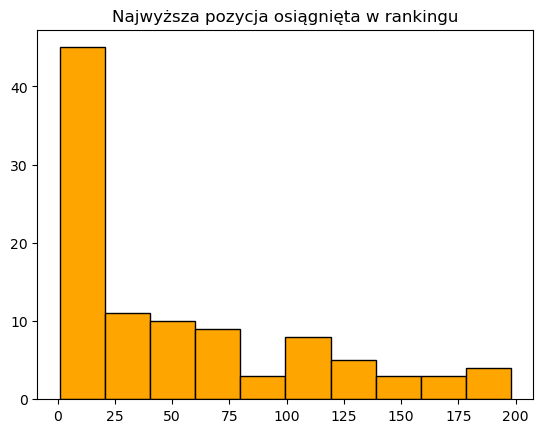

In [9]:
plt.hist(df['highest_charting_position'], edgecolor = "black", color = "orange")
plt.title('Najwyższa pozycja osiągnięta w rankingu')
plt.show()

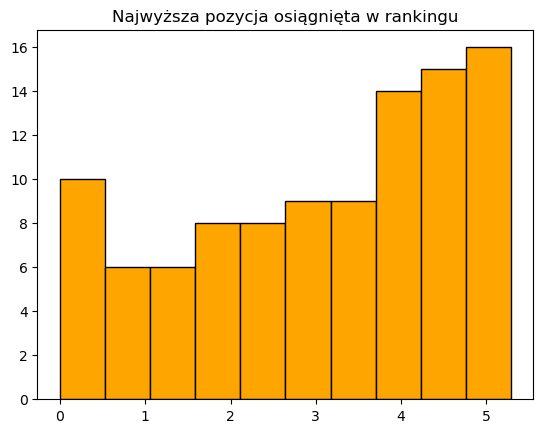

In [10]:
plt.hist(np.log(df['highest_charting_position']), edgecolor = "black", color = "orange")
plt.title('Najwyższa pozycja osiągnięta w rankingu')
plt.show() #wolę nie logarytmować zmiennej objaśnianej

zmienne objaśniające

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


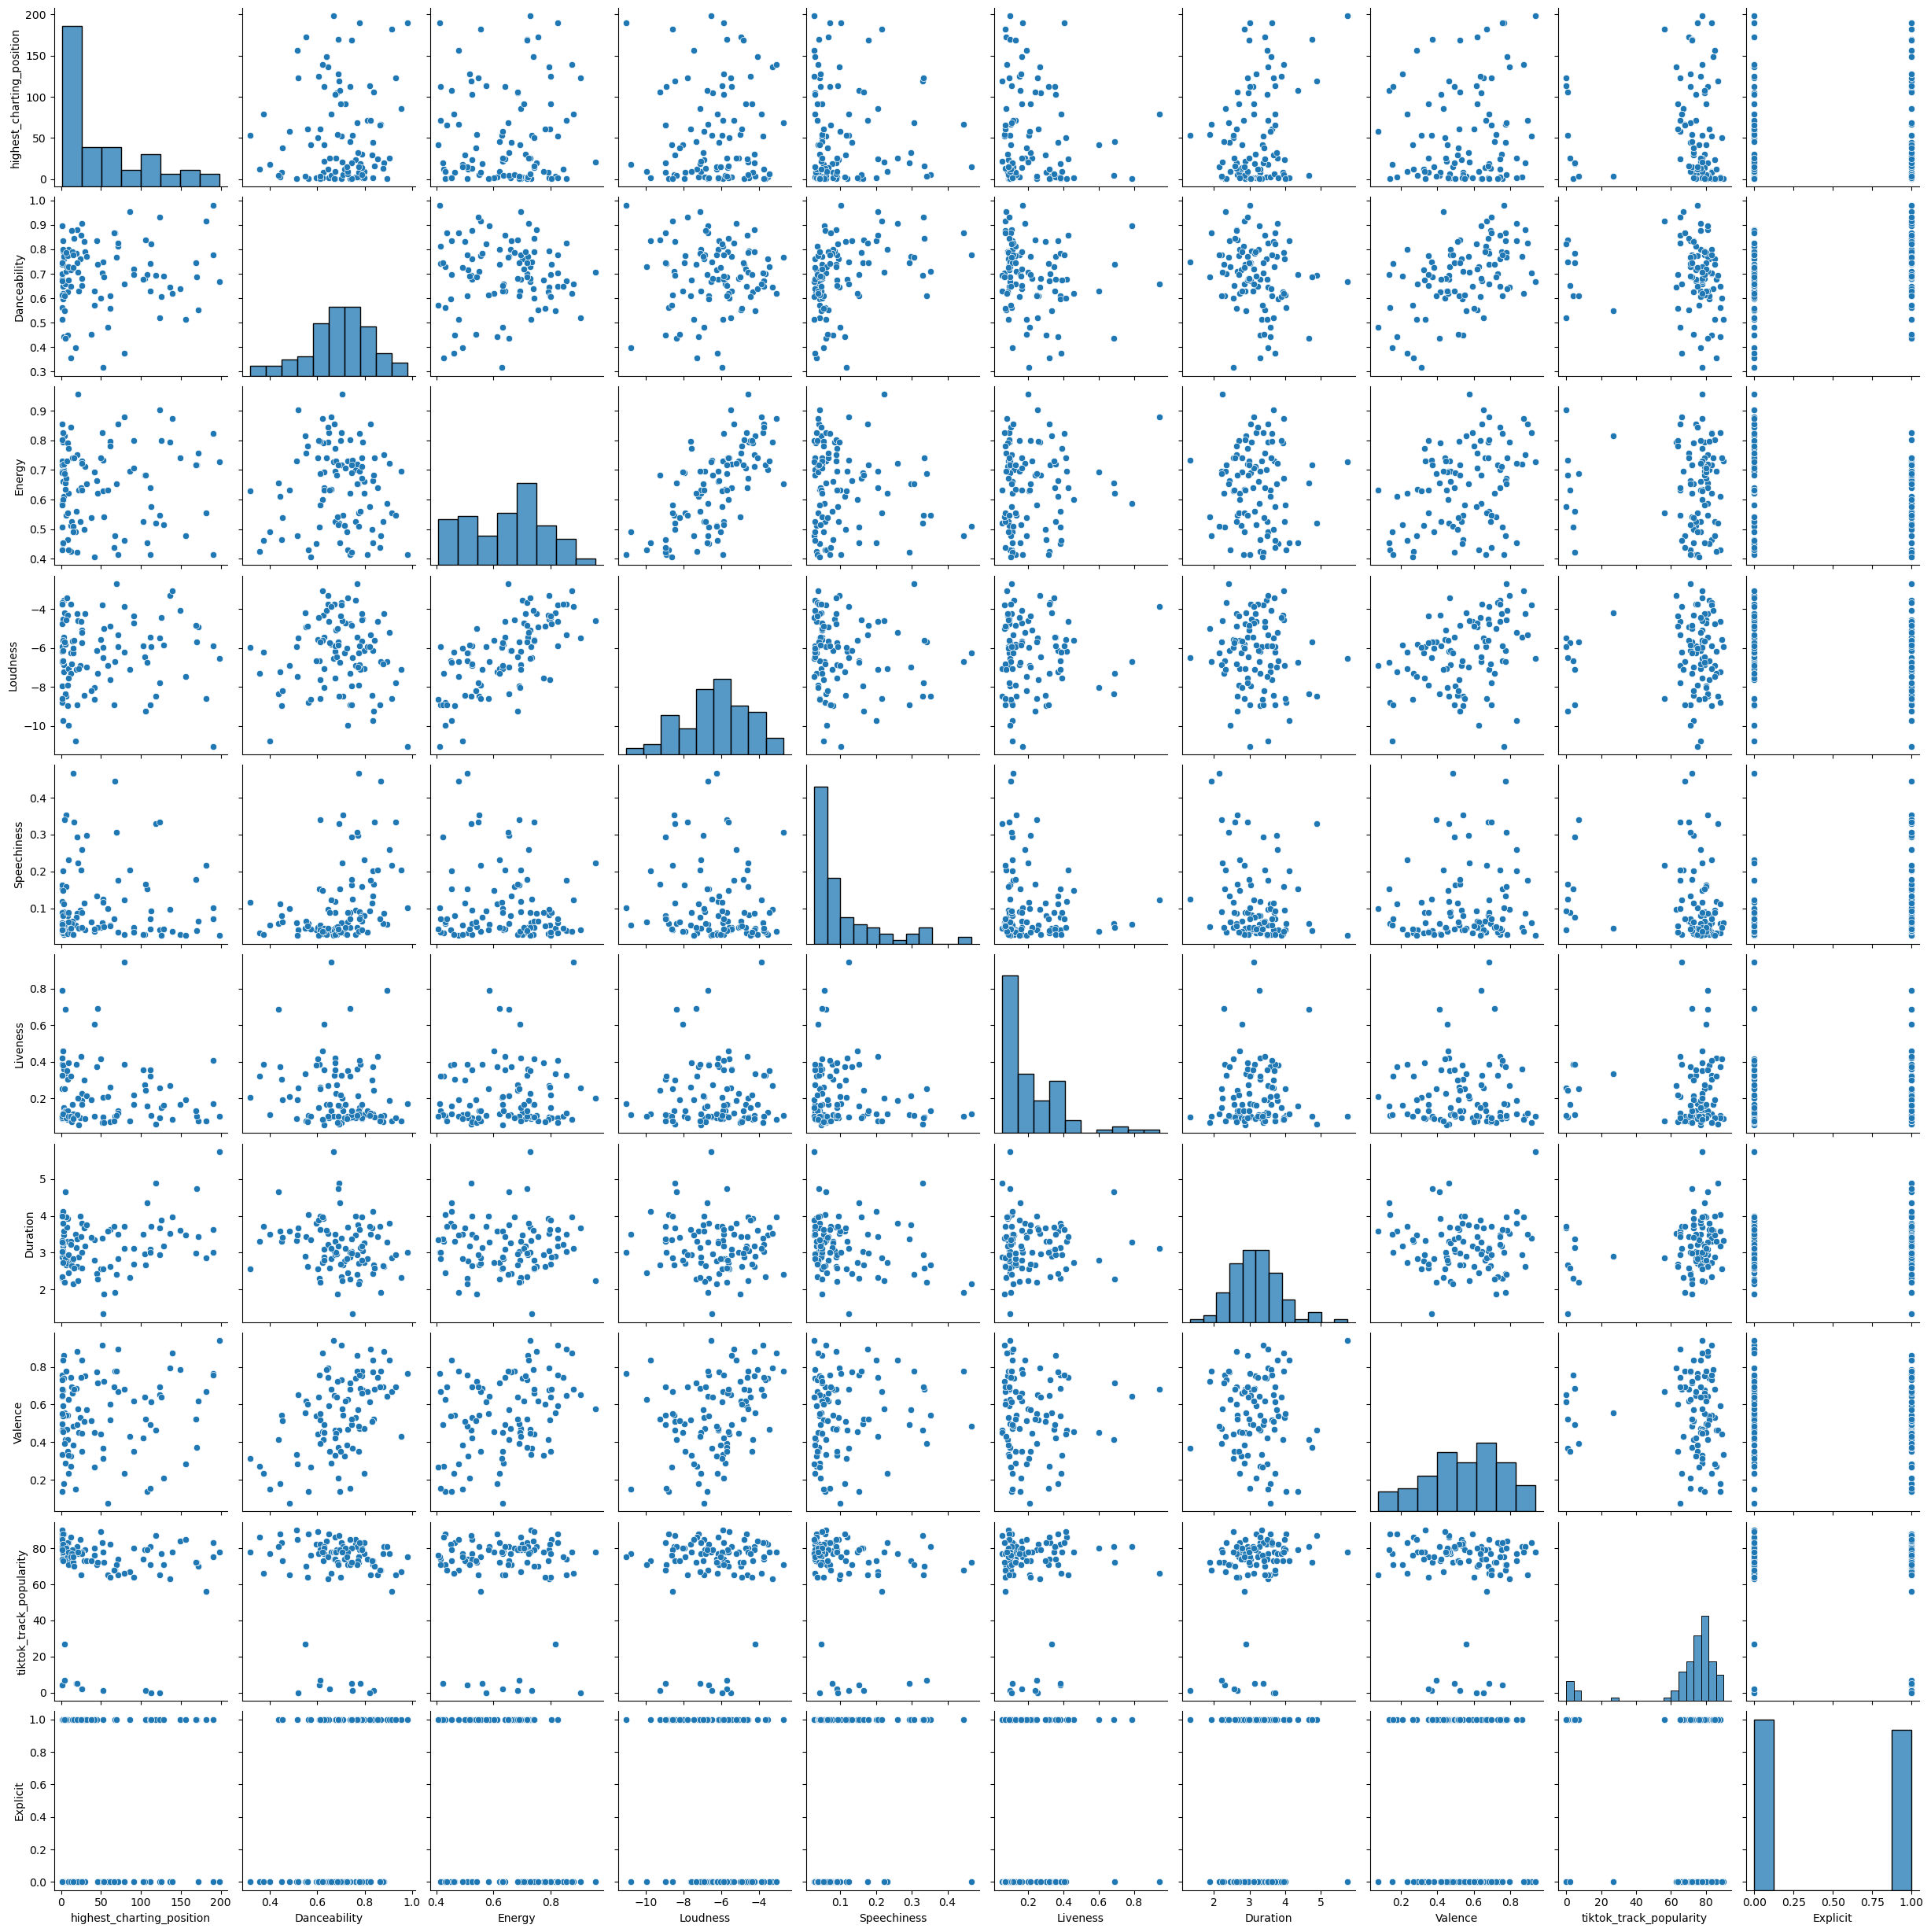

In [11]:
sn.pairplot(df) #tylko poglądowo, nie wrzucam tego do raportu
#plt.savefig('pairplot.png')
#warto byłoby zlogarytmować tiktok_track_popularity, jednak nie mogę tego zrobić ponieważ występuje tam wartość 0

In [12]:
df_log = df.copy()

In [13]:
df_log = df_log.apply(np.log)#dataframe z logarytmowanymi zmiennymi

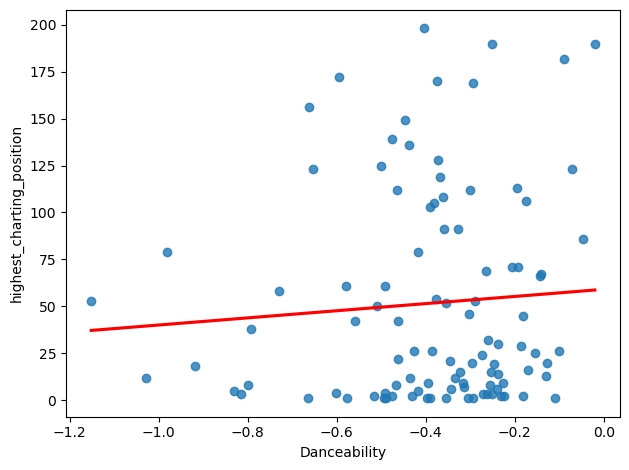

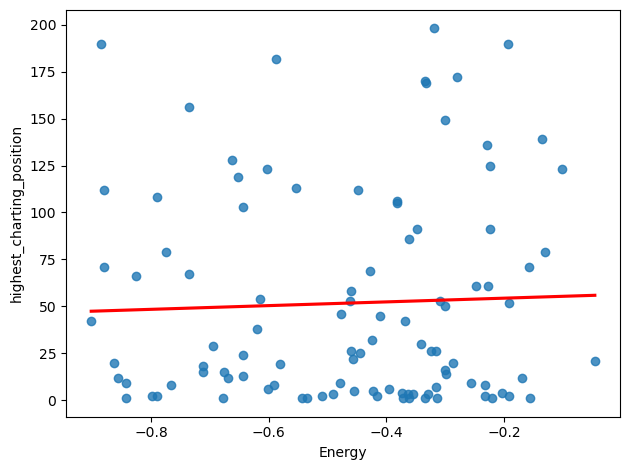

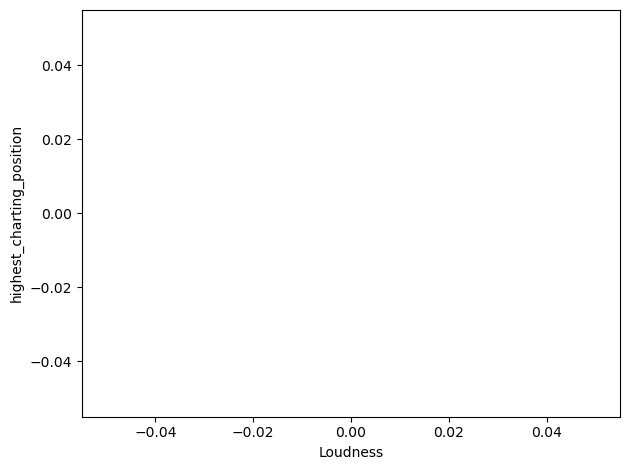

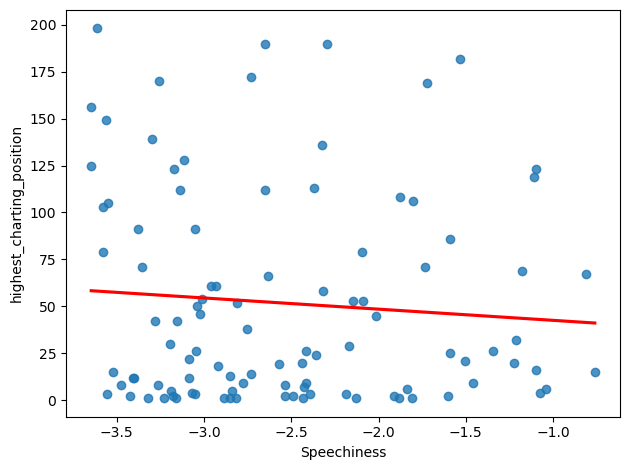

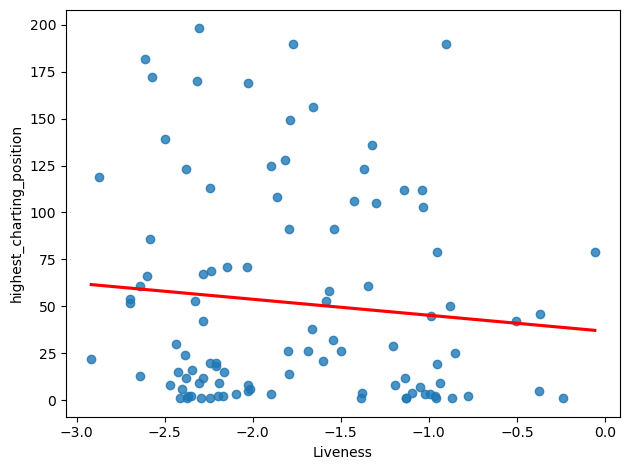

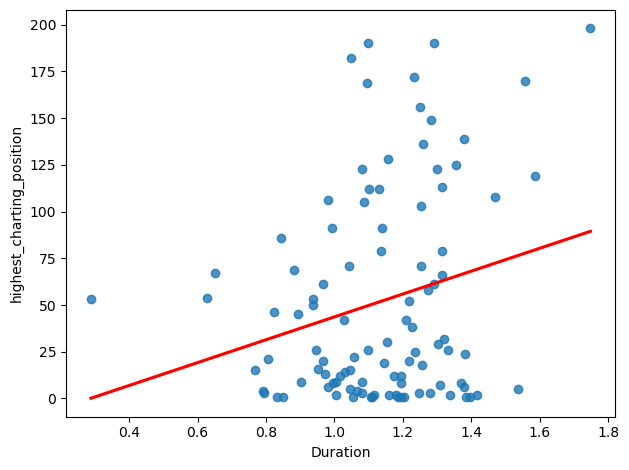

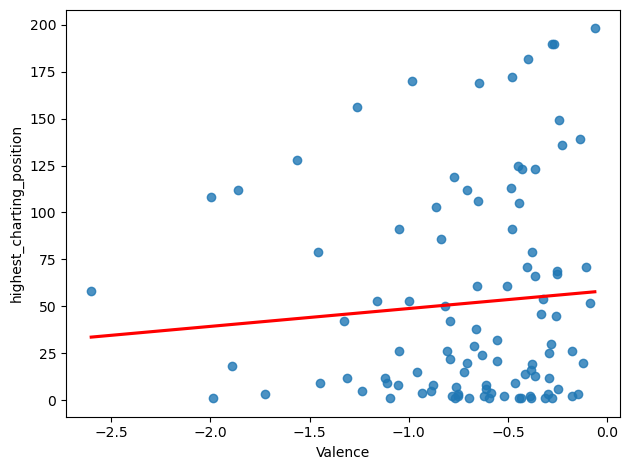

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\function_base.py:157: RuntimeWarning: invalid value encountered in multiply
  y *= step
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\function_base.py:167: RuntimeWarning: invalid value encountered in add
  y += start


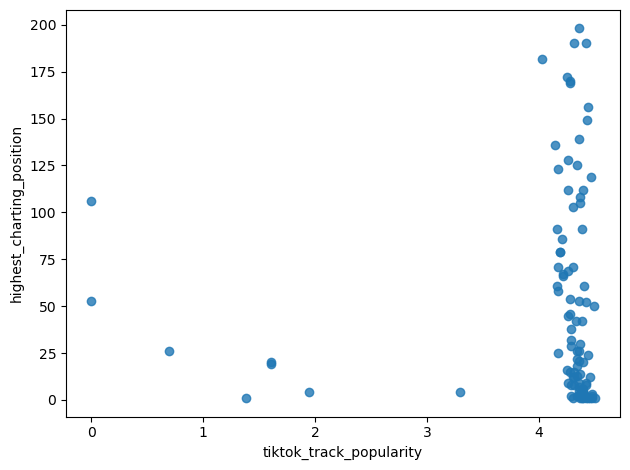

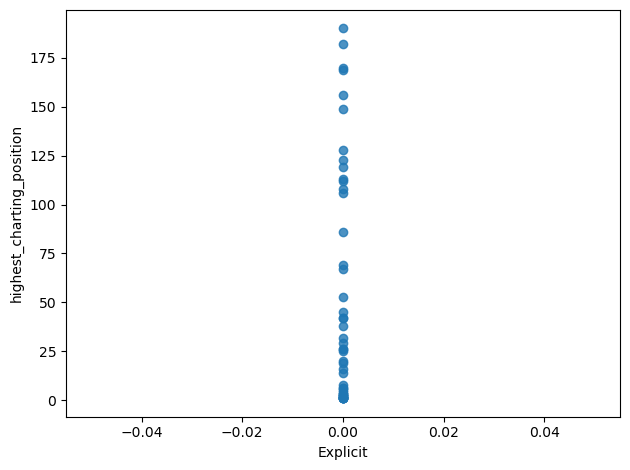

In [14]:
for zmienna in ['Danceability', 'Energy', 'Loudness',
       'Speechiness', 'Liveness', 'Duration', 'Valence',
       'tiktok_track_popularity', 'Explicit']:
    sn.regplot(x = df_log[zmienna], y = df['highest_charting_position'], ci = None, line_kws = dict(color="red"))
    plt.tight_layout()
    plt.show() # ogólne porównanie z logarytmowanymi

In [15]:
#dokładniejsze przyjrzenie się wybranym przekształceniom zmiennych i czy warto je logarytmować
#zmienne, które przykuły moją uwagę: Liveness, Speechiness, Danceability

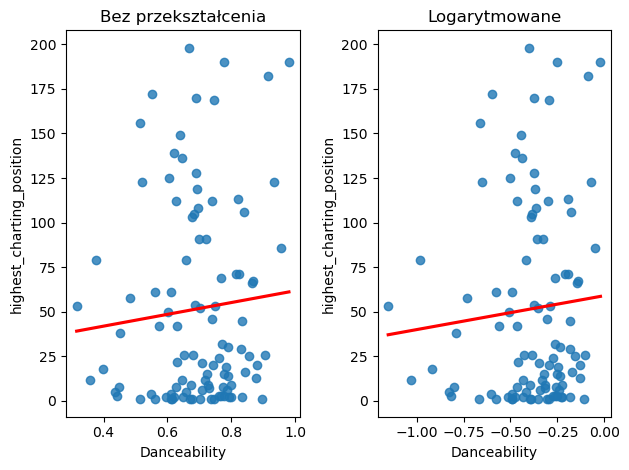

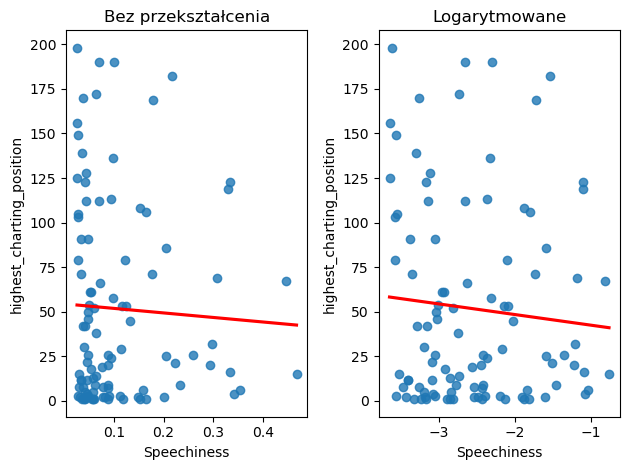

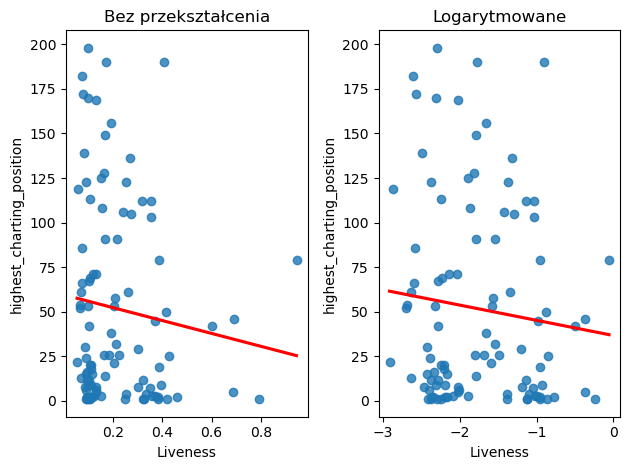

In [16]:
for zmienna in ['Danceability','Speechiness', 'Liveness']:
    plt.subplot(1, 2, 1)
    sn.regplot(x = df[zmienna], y = df['highest_charting_position'], ci = None, line_kws = dict(color="red"))
    plt.title('Bez przekształcenia')
    plt.subplot(1, 2, 2)
    sn.regplot(x = df_log[zmienna], y = df['highest_charting_position'], ci = None, line_kws = dict(color="red"))
    plt.title('Logarytmowane')
    plt.tight_layout()
    plt.show() # ogólne porównanie z logarytmowanymi

In [17]:
#decyduje się logarytmować liveness oraz speechiness

In [18]:
#edytuje mój dataframe tak aby zawierał już tylko zmienne używane do modelu (to znaczy przekształcone)
#dodaję także relację kwadratową, która zawarta jest w jednej z hipotez

In [19]:
df['Liveness'] = df['Liveness'].apply(np.log)

In [20]:
df['Speechiness'] = df['Speechiness'].apply(np.log)

In [21]:
df = df.rename(columns = {'Liveness':'log_Liveness', 'Speechiness' : 'log_Speechiness'})

In [22]:
df['Duration_sq'] = df['Duration'] ** 2

teraz zajmuje się zmienną zero jedynkową Explicit, czy powinna ona znaleźć się w modelu?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


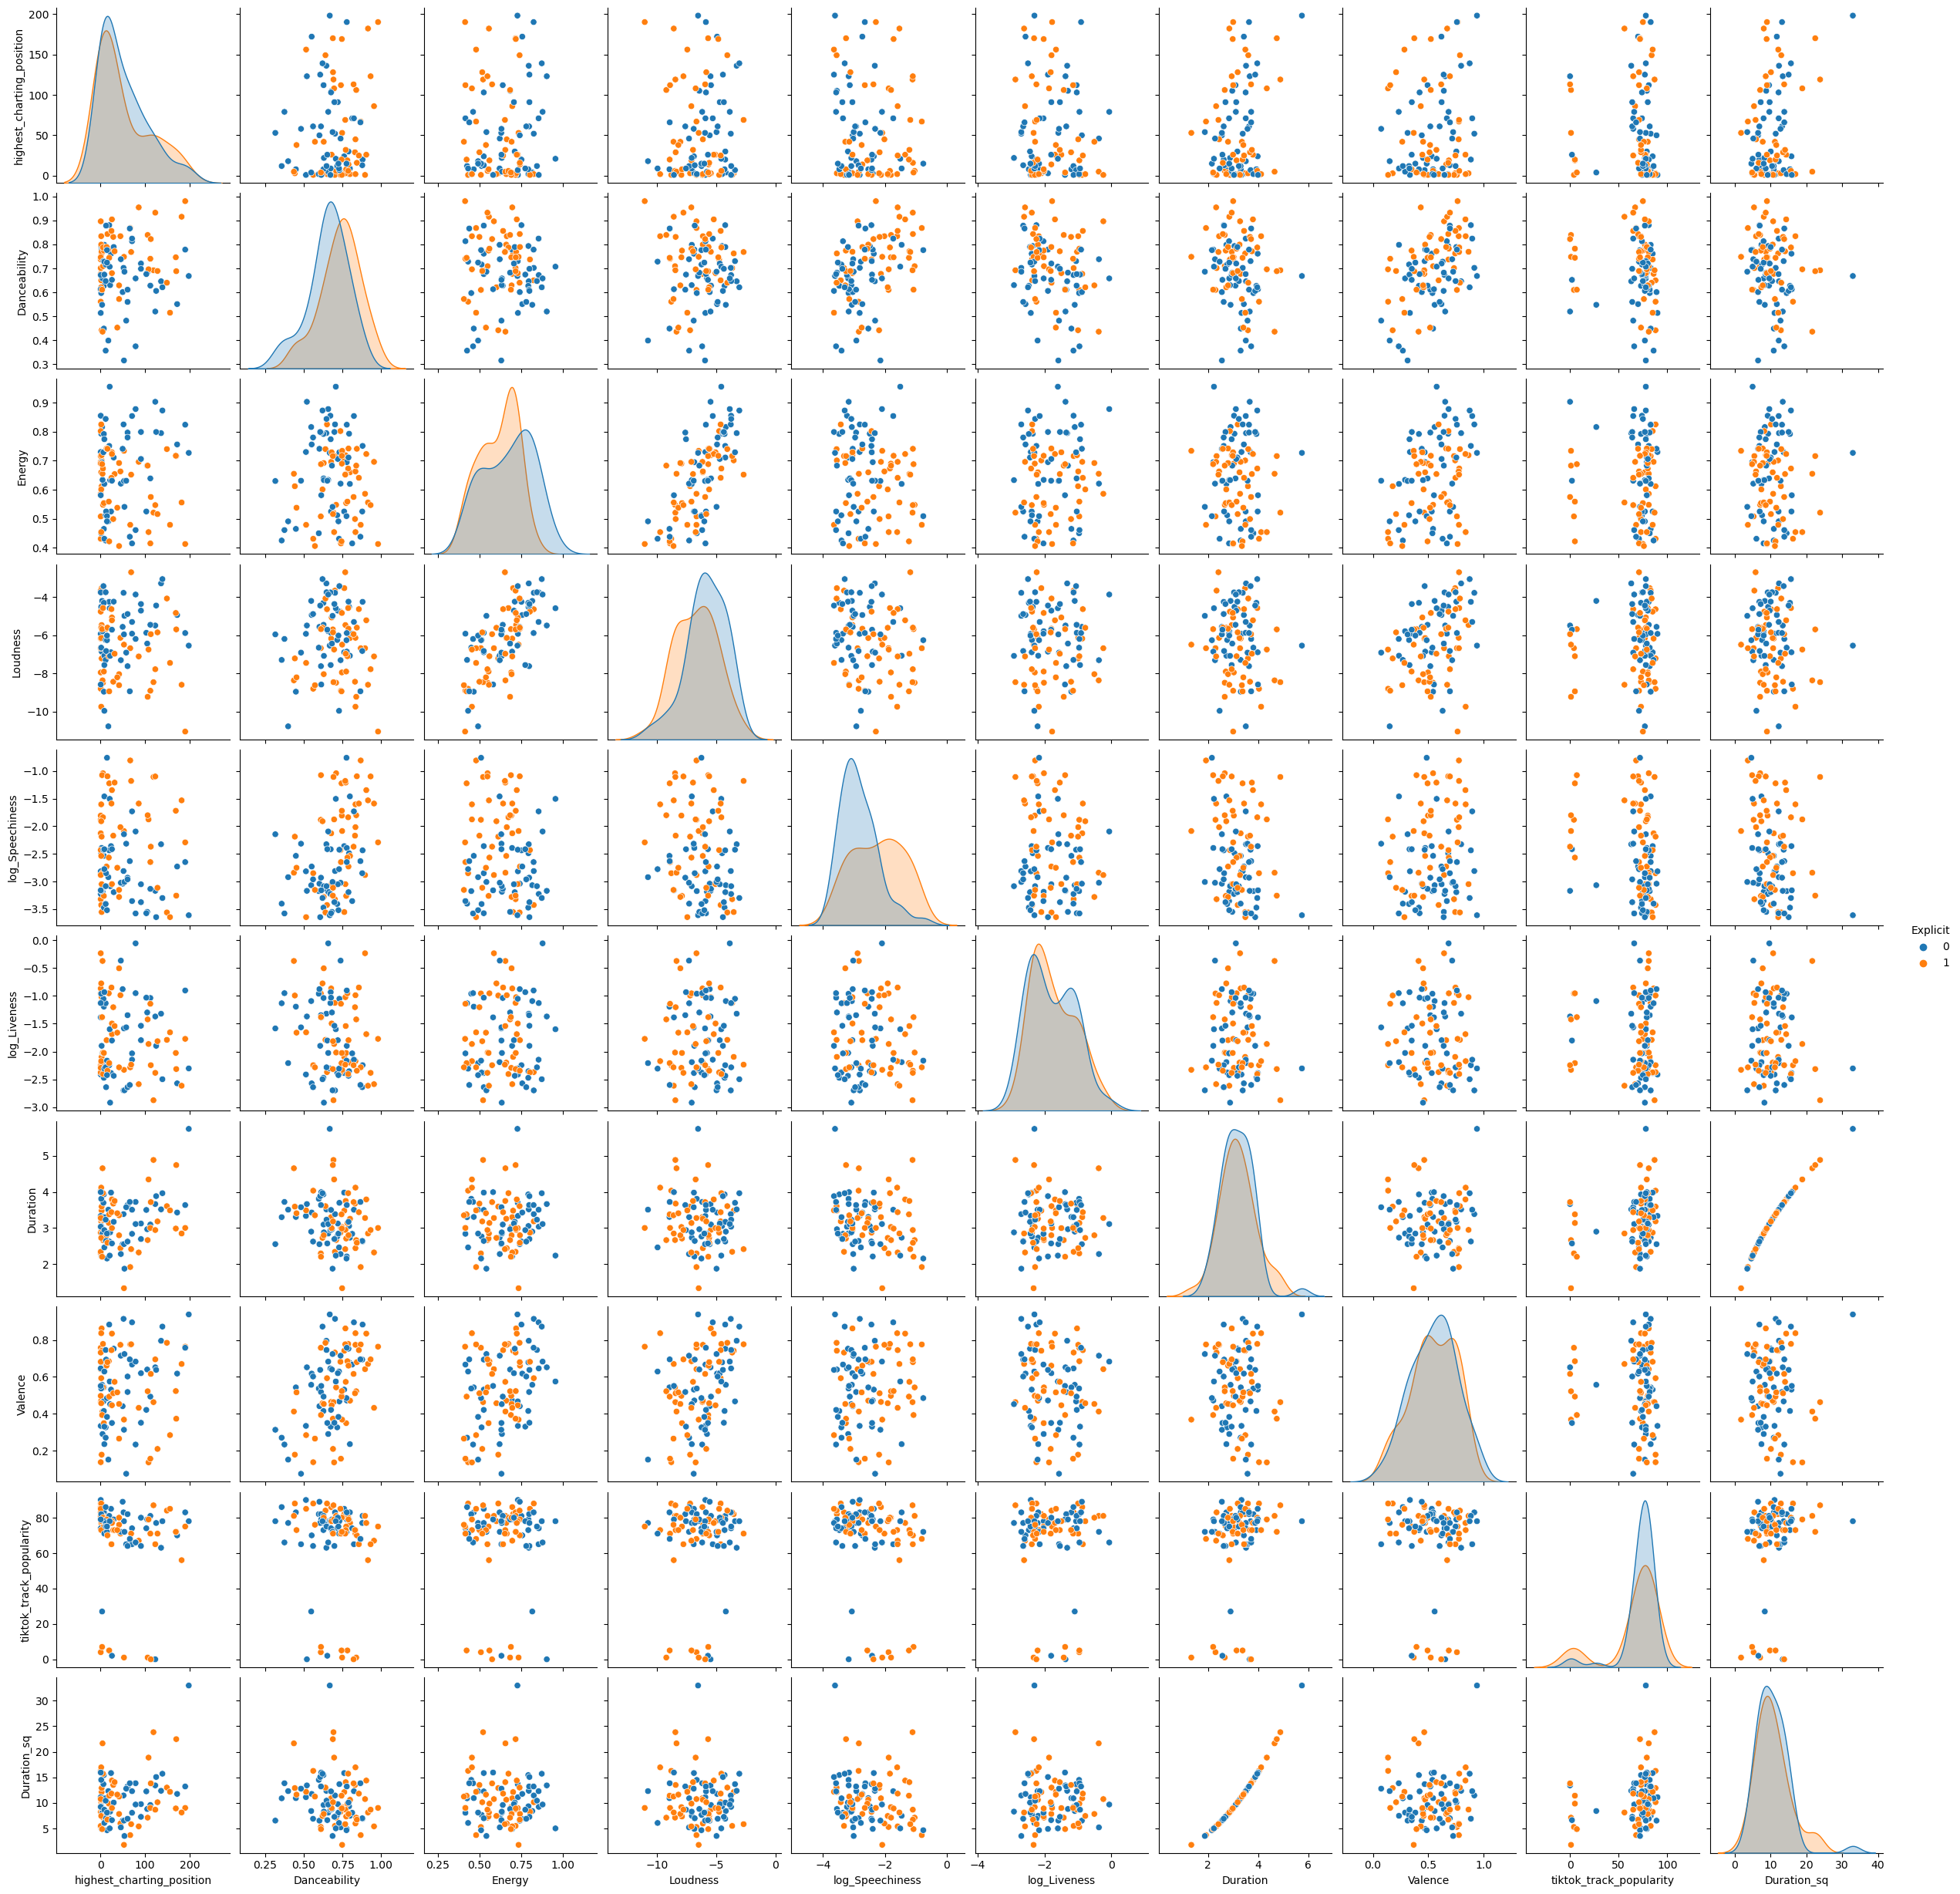

In [23]:
sn.pairplot(df, hue='Explicit')

In [24]:
#wykresy gęstości highest charting position wskazują że zmienna Explicit nie różnicuje danych w istotny sposób 
#może zatem warto zastosować interakcje z inną zmienną

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


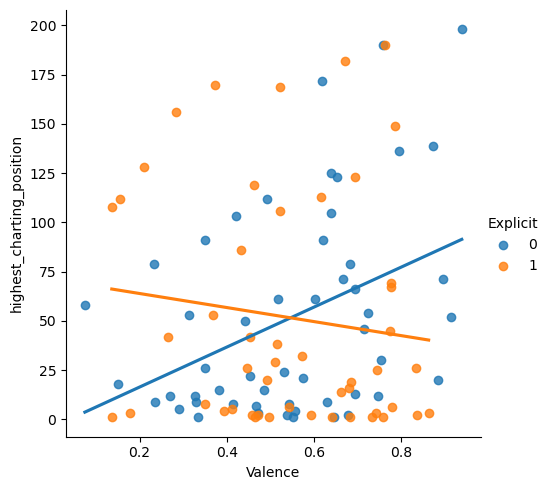

In [25]:
sn.lmplot(x = 'Valence', y = "highest_charting_position", data = df, ci = None, hue = "Explicit")
plt.show()

In [26]:
#na powyższym wykresie rozrzutu, widać iż zmienna Valence może mieć inny wpływ na highest_charting_position w zależności
#od tego czy ma ona oznaczenie Explicit czy nie (1 lub 0)

## Analiza ekonometryczna

### Test na łączną nieistotność zmiennych objaśniających w modelu

In [27]:
m1 = smf.ols(formula = 'highest_charting_position ~ Danceability + Energy + Loudness + log_Speechiness + log_Liveness + Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.180
Model:                                   OLS   Adj. R-squared:                  0.079
Method:                        Least Squares   F-statistic:                     1.776
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0700
Time:                               22:11:30   Log-Likelihood:                -538.63
No. Observations:                        101   AIC:                             1101.
Df Residuals:                             89   BIC:                             1133.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -23.4450    110.343     -0.212      0.832    -242.695     195.805
Danceability               57.5015     54.672      1.052      0.296     -51.130     166.133
Energy                     11.2120     56.343      0.199      0.843    -100.740     123.164
Loudness                   -0.2494      4.338     -0.057      0.954      -8.870       8.371
log_Speechiness            -7.5034      8.466     -0.886      0.378     -24.325       9.319
log_Liveness               -4.0825      8.612     -0.474      0.637     -21.195      13.030
Duration                  -25.0628     47.089     -0.532      0.596    -118.627      68.501
Duration_sq                 7.1955      6.900      1.043      0.300      -6.515      20.906
tiktok_track_popularity    -0.3766      0.253     -1.489      0.140      -0.879       0.126
Valence                    57.2049     45.132      1.268      0.208     -32.471     146.881
Explicit                   47.0864     32.368      1.455      0.149     -17.228     111.401
Valence:Explicit          -90.8591     55.785     -1.629      0.107    -201.702      19.984
==============================================================================
Omnibus:                       12.569   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.958
Skew:                           0.908   Prob(JB):                     0.000931
Kurtosis:                       3.142   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Wniosek: p-value = 0.07 < 0.1
# odrzucam H0 o łącznej nieistotności zmiennych, więc co najmniej jedna zmienna w modelu jest istotna

### Analiza korelacji zmiennych

In [29]:
#ponieważ podejrzewam, że nie wszystkie zmienne mają rozkład normalny to użyję korelacji rang Spearman'a

In [30]:
#nie dawać tego do raportu, w sensie tej tabelki, wystarczy że wspomne że robie to na podstawie macierzy korelacji

In [31]:
df.corr(method = 'spearman').style.background_gradient()

,highest_charting_position,Danceability,Energy,Loudness,log_Speechiness,log_Liveness,Duration,Valence,tiktok_track_popularity,Explicit,Duration_sq
highest_charting_position,1.000000,0.062739,0.028224,0.032384,-0.052125,-0.116785,0.133903,0.105585,-0.345718,-0.081257,0.133903
Danceability,0.062739,1.000000,-0.068959,-0.042284,0.439988,-0.235887,-0.227215,0.454712,-0.208241,0.305442,-0.227215
Energy,0.028224,-0.068959,1.000000,0.704181,-0.092706,0.015965,-0.029390,0.326613,0.060146,-0.222208,-0.029390
Loudness,0.032384,-0.042284,0.704181,1.000000,-0.213050,-0.030671,-0.064514,0.375602,0.008874,-0.237826,-0.064514
log_Speechiness,-0.052125,0.439988,-0.092706,-0.213050,1.000000,-0.054677,-0.212496,0.117700,-0.259219,0.366258,-0.212496
log_Liveness,-0.116785,-0.235887,0.015965,-0.030671,-0.054677,1.000000,0.007112,-0.107656,0.055207,0.072710,0.007112
Duration,0.133903,-0.227215,-0.029390,-0.064514,-0.212496,0.007112,1.000000,-0.011025,0.236947,0.006116,1.000000
Valence,0.105585,0.454712,0.326613,0.375602,0.117700,-0.107656,-0.011025,1.000000,-0.086875,0.006795,-0.011025
tiktok_track_popularity,-0.345718,-0.208241,0.060146,0.008874,-0.259219,0.055207,0.236947,-0.086875,1.000000,-0.035714,0.236947
Explicit,-0.081257,0.305442,-0.222208,-0.237826,0.366258,0.072710,0.006116,0.006795,-0.035714,1.000000,0.006116


In [32]:
#wnioski:
#wysoka korelacja między zmiennymi objaśniającymi Loudness oraz Energy
#Umiarkowana korelacja między zmiennymi objaśniającymi log_Speechiness oraz Danceability; Valence oraz Danceability;
#log_speechiness oraz Explicit; Loudness oraz Valence; Valence oraz Energy; Explicit oraz Danceability

In [33]:
#wnioski c.d:
#wszystkie zmienne objaśniające wykazują relatywnie niską korelację ze zmienną highest_charting_position
#trochę podwyższone wartości mają tylko Duration, log_Liveness, Valence,tiktok_track_popularity
#w tym tiktok_track_popularity zdecydowanie najbardziej wyróżnia się swoją umiarkowaną korelacją

## Proces selekcji zmiennych do modelu - metoda od ogólnego do szczegółowego

In [34]:
#po kolei usuwam zmienne z najwyższą wartością p-value
#gdy p-value>0.1 to przyjmuje H0, które mówi że zmienna jest statystycznie nieistotna (test na istotność zmiennej)
#dodatkowo za pomocą testu F badam łączną nieistotność usuniętych zmiennych (H0: zmienne są łącznie nieistotne)

In [35]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.180
Model:                                   OLS   Adj. R-squared:                  0.079
Method:                        Least Squares   F-statistic:                     1.776
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0700
Time:                               22:11:30   Log-Likelihood:                -538.63
No. Observations:                        101   AIC:                             1101.
Df Residuals:                             89   BIC:                             1133.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -23.4450    110.343     -0.212      0.832    -242.695     195.805
Danceability               57.5015     54.672      1.052      0.296     -51.130     166.133
Energy                     11.2120     56.343      0.199      0.843    -100.740     123.164
Loudness                   -0.2494      4.338     -0.057      0.954      -8.870       8.371
log_Speechiness            -7.5034      8.466     -0.886      0.378     -24.325       9.319
log_Liveness               -4.0825      8.612     -0.474      0.637     -21.195      13.030
Duration                  -25.0628     47.089     -0.532      0.596    -118.627      68.501
Duration_sq                 7.1955      6.900      1.043      0.300      -6.515      20.906
tiktok_track_popularity    -0.3766      0.253     -1.489      0.140      -0.879       0.126
Valence                    57.2049     45.132      1.268      0.208     -32.471     146.881
Explicit                   47.0864     32.368      1.455      0.149     -17.228     111.401
Valence:Explicit          -90.8591     55.785     -1.629      0.107    -201.702      19.984
==============================================================================
Omnibus:                       12.569   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.958
Skew:                           0.908   Prob(JB):                     0.000931
Kurtosis:                       3.142   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#usuwam zmienną Loudness
hip1 = '(Loudness = 0)'
m1.f_test(hip1)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.0033052680033143836, p=0.9542825894586442, df_denom=89, df_num=1>

In [37]:
m2 = smf.ols(formula = 'highest_charting_position ~ Danceability + Energy + log_Speechiness + log_Liveness + Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.180
Model:                                   OLS   Adj. R-squared:                  0.089
Method:                        Least Squares   F-statistic:                     1.975
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0452
Time:                               22:11:30   Log-Likelihood:                -538.63
No. Observations:                        101   AIC:                             1099.
Df Residuals:                             90   BIC:                             1128.
Df Model:                                 10                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -20.1646     93.921     -0.215      0.830    -206.755     166.426
Danceability               57.6956     54.264      1.063      0.291     -50.110     165.501
Energy                      9.2122     44.077      0.209      0.835     -78.355      96.780
log_Speechiness            -7.4232      8.304     -0.894      0.374     -23.921       9.074
log_Liveness               -4.0384      8.530     -0.473      0.637     -20.985      12.908
Duration                  -25.1647     46.794     -0.538      0.592    -118.129      67.800
Duration_sq                 7.2224      6.846      1.055      0.294      -6.378      20.823
tiktok_track_popularity    -0.3774      0.251     -1.503      0.136      -0.876       0.122
Valence                    56.8607     44.485      1.278      0.204     -31.516     145.237
Explicit                   47.1609     32.163      1.466      0.146     -16.736     111.057
Valence:Explicit          -90.9759     55.438     -1.641      0.104    -201.114      19.162
==============================================================================
Omnibus:                       12.665   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.063
Skew:                           0.911   Prob(JB):                     0.000883
Kurtosis:                       3.157   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#usuwam zmienną Energy
hip2 = '(Loudness = 0), (Energy=0)'
m1.f_test(hip2)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.02325139654117964, p=0.9770227670507294, df_denom=89, df_num=2>

In [39]:
m3 = smf.ols(formula = 'highest_charting_position ~ Danceability + log_Speechiness + log_Liveness + Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.180
Model:                                   OLS   Adj. R-squared:                  0.098
Method:                        Least Squares   F-statistic:                     2.213
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0280
Time:                               22:11:30   Log-Likelihood:                -538.65
No. Observations:                        101   AIC:                             1097.
Df Residuals:                             91   BIC:                             1123.
Df Model:                                  9                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -14.2778     89.126     -0.160      0.873    -191.316     162.760
Danceability               56.0897     53.435      1.050      0.297     -50.051     162.231
log_Speechiness            -7.4043      8.260     -0.896      0.372     -23.811       9.003
log_Liveness               -3.8961      8.458     -0.461      0.646     -20.697      12.905
Duration                  -25.1001     46.546     -0.539      0.591    -117.559      67.358
Duration_sq                 7.1899      6.808      1.056      0.294      -6.334      20.714
tiktok_track_popularity    -0.3776      0.250     -1.512      0.134      -0.874       0.119
Valence                    60.1921     41.312      1.457      0.149     -21.869     142.254
Explicit                   47.4354     31.966      1.484      0.141     -16.062     110.933
Valence:Explicit          -92.2766     54.798     -1.684      0.096    -201.125      16.572
==============================================================================
Omnibus:                       12.522   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.901
Skew:                           0.906   Prob(JB):                     0.000958
Kurtosis:                       3.138   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#usuwam zmienną log_Liveness
hip3 = '(Loudness = 0), (Energy=0), (log_Liveness=0)'
m1.f_test(hip3)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.08471035322409466, p=0.9682236844993501, df_denom=89, df_num=3>

In [41]:
m4 = smf.ols(formula = 'highest_charting_position ~ Danceability + log_Speechiness + Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.178
Model:                                   OLS   Adj. R-squared:                  0.106
Method:                        Least Squares   F-statistic:                     2.485
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0173
Time:                               22:11:30   Log-Likelihood:                -538.77
No. Observations:                        101   AIC:                             1096.
Df Residuals:                             92   BIC:                             1119.
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.0988     86.965     -0.070      0.944    -178.818     166.620
Danceability               62.1501     51.567      1.205      0.231     -40.267     164.567
log_Speechiness            -7.1374      8.204     -0.870      0.387     -23.431       9.157
Duration                  -28.3152     45.823     -0.618      0.538    -119.323      62.693
Duration_sq                 7.7084      6.686      1.153      0.252      -5.570      20.987
tiktok_track_popularity    -0.3694      0.248     -1.489      0.140      -0.862       0.123
Valence                    59.7343     41.123      1.453      0.150     -21.939     141.408
Explicit                   47.2896     31.828      1.486      0.141     -15.923     110.502
Valence:Explicit          -93.6131     54.486     -1.718      0.089    -201.827      14.601
==============================================================================
Omnibus:                       12.813   Durbin-Watson:                   1.146
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.217
Skew:                           0.915   Prob(JB):                     0.000818
Kurtosis:                       3.181   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
#ponieważ zmienna Duration występuje w relacji kwadratowej, która nie posiada najwyższego aktualnie p-value
#to decyduje się usunąć zmienną z drugim najwyższym p-value czyli log_Speechiness
#usuwam zmienną log_Speechines
hip4 = '(Loudness = 0), (Energy=0), (log_Liveness=0), (log_Speechiness=0)'
m1.f_test(hip4)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.24710539850910582, p=0.9107125231375404, df_denom=89, df_num=4>

In [43]:
m5 = smf.ols(formula = 'highest_charting_position ~ Danceability + Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.171
Model:                                   OLS   Adj. R-squared:                  0.109
Method:                        Least Squares   F-statistic:                     2.739
Date:                       Sun, 19 May 2024   Prob (F-statistic):             0.0125
Time:                               22:11:30   Log-Likelihood:                -539.18
No. Observations:                        101   AIC:                             1094.
Df Residuals:                             93   BIC:                             1115.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   6.9118     85.557      0.081      0.936    -162.987     176.811
Danceability               49.4163     49.382      1.001      0.320     -48.646     147.479
Duration                  -22.4937     45.272     -0.497      0.620    -112.395      67.408
Duration_sq                 6.9699      6.623      1.052      0.295      -6.182      20.122
tiktok_track_popularity    -0.3386      0.245     -1.381      0.171      -0.826       0.148
Valence                    64.4889     40.705      1.584      0.117     -16.343     145.321
Explicit                   47.8743     31.779      1.506      0.135     -15.232     110.981
Valence:Explicit         -100.1751     53.891     -1.859      0.066    -207.191       6.841
==============================================================================
Omnibus:                       12.930   Durbin-Watson:                   1.162
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               14.411
Skew:                           0.921   Prob(JB):                     0.000742
Kurtosis:                       3.170   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#podobnie jak wcześniej, ponieważ zmienna Duration występuje w relacji kwadratowej, która nie posiada najwyższego aktualnie p-value
#to decyduje się usunąć zmienną z drugim najwyższym p-value czyli Danceability
#usuwam zmienną log_Speechines
hip5 = '(Loudness = 0), (Energy=0), (log_Liveness=0), (log_Speechiness=0), (Danceability=0)'
m1.f_test(hip5)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.3914786149623578, p=0.8534805637187457, df_denom=89, df_num=5>

In [45]:
m6 = smf.ols(formula = 'highest_charting_position ~ Duration + Duration_sq +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.162
Model:                                   OLS   Adj. R-squared:                  0.108
Method:                        Least Squares   F-statistic:                     3.028
Date:                       Sun, 19 May 2024   Prob (F-statistic):            0.00944
Time:                               22:11:30   Log-Likelihood:                -539.73
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             94   BIC:                             1112.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  36.1930     80.398      0.450      0.654    -123.440     195.826
Duration                  -24.5833     45.224     -0.544      0.588    -114.377      65.211
Duration_sq                 6.9539      6.623      1.050      0.296      -6.196      20.104
tiktok_track_popularity    -0.3295      0.245     -1.344      0.182      -0.816       0.157
Valence                    81.3704     37.045      2.197      0.031       7.817     154.924
Explicit                   52.8422     31.389      1.683      0.096      -9.481     115.166
Valence:Explicit         -101.8340     53.866     -1.891      0.062    -208.785       5.118
==============================================================================
Omnibus:                       13.685   Durbin-Watson:                   1.151
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.189
Skew:                           0.937   Prob(JB):                     0.000503
Kurtosis:                       3.309   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
#skorygowane R2 zmalało, jednak jest to moim zdaniem marginalna wartość, która jest nieistotna

In [47]:
#ponieważ zmienna Duration występuje w relacji kwadratowej, która posiada najwyższe aktualnie p-value
#to decyduje się usunąć z modelu Duration_sq
#usuwam zmienną Duration_sq
hip6 = '(Loudness = 0), (Energy=0), (log_Liveness=0), (log_Speechiness=0), (Danceability=0), (Duration_sq=0)'
m1.f_test(hip6)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.5040246092198489, p=0.8038027059104409, df_denom=89, df_num=6>

In [48]:
m7 = smf.ols(formula = 'highest_charting_position ~ Duration +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.152
Model:                                   OLS   Adj. R-squared:                  0.108
Method:                        Least Squares   F-statistic:                     3.410
Date:                       Sun, 19 May 2024   Prob (F-statistic):            0.00707
Time:                               22:11:30   Log-Likelihood:                -540.31
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             95   BIC:                             1108.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -40.7361     33.120     -1.230      0.222    -106.487      25.015
Duration                   22.1289      8.126      2.723      0.008       5.997      38.260
tiktok_track_popularity    -0.3654      0.243     -1.505      0.136      -0.847       0.117
Valence                    89.0038     36.344      2.449      0.016      16.852     161.156
Explicit                   58.9020     30.871      1.908      0.059      -2.384     120.188
Valence:Explicit         -112.2173     52.979     -2.118      0.037    -217.393      -7.041
==============================================================================
Omnibus:                       11.261   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.302
Skew:                           0.854   Prob(JB):                      0.00213
Kurtosis:                       3.068   Cond. No.                         949.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#usuwam zmienną tiktok_track_popularity
hip7 = '(Loudness = 0), (Energy=0), (log_Liveness=0), (log_Speechiness=0), (Danceability=0), (Duration_sq=0), (tiktok_track_popularity=0)'
m1.f_test(hip7)
#p-value>0.1
#przyjmuje H0 zmienne są łącznie nieistotne

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=0.7453770124406214, p=0.6342303392585611, df_denom=89, df_num=7>

In [50]:
m8 = smf.ols(formula = 'highest_charting_position ~ Duration +  Valence * Explicit', data = df).fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.132
Model:                                   OLS   Adj. R-squared:                  0.096
Method:                        Least Squares   F-statistic:                     3.648
Date:                       Sun, 19 May 2024   Prob (F-statistic):            0.00824
Time:                               22:11:30   Log-Likelihood:                -541.50
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             96   BIC:                             1106.
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -58.8536     31.056     -1.895      0.061    -120.500       2.793
Duration            19.2865      7.955      2.424      0.017       3.496      35.077
Valence             90.2488     36.573      2.468      0.015      17.652     162.846
Explicit            61.4147     31.028      1.979      0.051      -0.175     123.004
Valence:Explicit  -112.7043     53.325     -2.114      0.037    -218.554      -6.854
==============================================================================
Omnibus:                        9.904   Durbin-Watson:                   1.105
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.835
Skew:                           0.800   Prob(JB):                      0.00444
Kurtosis:                       2.869   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Skorygowany współczynnik R2 zdecydowanie zmalał po usunięci zmiennej Tiktok_track_popularity

Dlatego decyduje się zostawić niniejszą zmienną w modelu i jako **finalny wybrać model 7**

także pomimo tego że model5 posiada najwyższe skorygowane R2, ale za to wiele zmiennych w nim wydaje się być statystycznie nieistotnych

In [51]:
Stargazer([m1, m2, m3,m4,m5,m6,m7,m8])

In [52]:
wydruk = Stargazer([m1, m2, m3,m4,m5,m6,m7,m8])

In [53]:
wydruk.render_html()

'<table style="text-align:center"><tr><td colspan="9" style="border-bottom: 1px solid black"></td></tr>\n<tr><td style="text-align:left"></td><td colspan="8"><em>Dependent variable: highest_charting_position</em></td></tr><tr><td style="text-align:left"></td><tr><td style="text-align:left"></td><td>(1)</td><td>(2)</td><td>(3)</td><td>(4)</td><td>(5)</td><td>(6)</td><td>(7)</td><td>(8)</td></tr>\n<tr><td colspan="9" style="border-bottom: 1px solid black"></td></tr>\n\n<tr><td style="text-align:left">Danceability</td><td>57.501<sup></sup></td><td>57.696<sup></sup></td><td>56.090<sup></sup></td><td>62.150<sup></sup></td><td>49.416<sup></sup></td><td></td><td></td><td></td></tr>\n<tr><td style="text-align:left"></td><td>(54.672)</td><td>(54.264)</td><td>(53.435)</td><td>(51.567)</td><td>(49.382)</td><td></td><td></td><td></td></tr>\n<tr><td style="text-align:left">Duration</td><td>-25.063<sup></sup></td><td>-25.165<sup></sup></td><td>-25.100<sup></sup></td><td>-28.315<sup></sup></td><td>-2

In [54]:
#finalnie w modelu nie warto zawierać nieliniowości (Duration^2)
#warto zawrzeć interakcje Valence oraz Explicit

## Testowanie założen KMRL

### 1. Prawidłowość formy funkcyjnej

graficzne

C:\Users\Michał\AppData\Local\Temp\ipykernel_13892\52656388.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


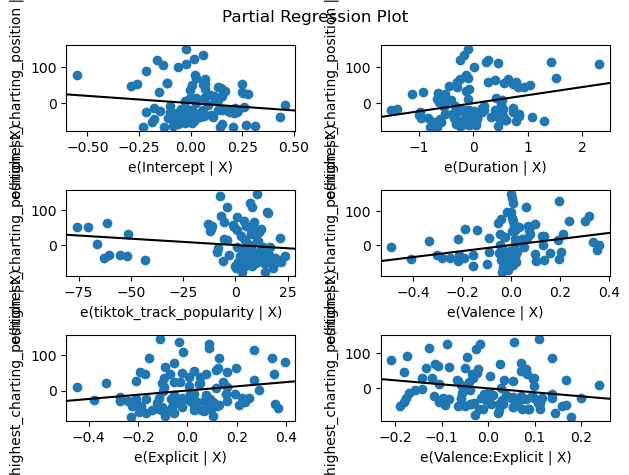

In [55]:
sm.graphics.plot_partregress_grid(m7)
plt.tight_layout()
plt.show()

TEST RESET

In [56]:
#sms.linear_reset(m7, power = 2, test_type = "fitted") 

In [57]:
#pojawia się błąd 
#ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [58]:
#próbuję obejść powyższy błąd

In [59]:
res = sm.OLS(m7.model.endog,m7.model.exog).fit()
sms.linear_reset(res, power=3, test_type='fitted')

<class 'statsmodels.stats.contrast.ContrastResults'>
<Wald test (chi2): statistic=3.506865533166909, p-value=0.17317844075993938, df_denom=2>

In [60]:
#p-value = 0.17 > 0.1 zatem przyjmujemy H0 mówiące o liniowości formy funkcyjnej

TEST CHOWA

In [61]:
#Explicit odpowiada za podział, więc trzeba je wyrzucić aby przeprowadzić test Chowa
m_chow = smf.ols(formula = 'highest_charting_position ~ Duration +tiktok_track_popularity +  Valence * Explicit', data = df).fit()
m_chow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.152
Model:                                   OLS   Adj. R-squared:                  0.108
Method:                        Least Squares   F-statistic:                     3.410
Date:                       Sun, 19 May 2024   Prob (F-statistic):            0.00707
Time:                               22:11:31   Log-Likelihood:                -540.31
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             95   BIC:                             1108.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -40.7361     33.120     -1.230      0.222    -106.487      25.015
Duration                   22.1289      8.126      2.723      0.008       5.997      38.260
tiktok_track_popularity    -0.3654      0.243     -1.505      0.136      -0.847       0.117
Valence                    89.0038     36.344      2.449      0.016      16.852     161.156
Explicit                   58.9020     30.871      1.908      0.059      -2.384     120.188
Valence:Explicit         -112.2173     52.979     -2.118      0.037    -217.393      -7.041
==============================================================================
Omnibus:                       11.261   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.302
Skew:                           0.854   Prob(JB):                      0.00213
Kurtosis:                       3.068   Cond. No.                         949.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
m_chow.ssr

262115.7011625438

In [63]:
m_chow_1 = smf.ols(formula = 'highest_charting_position ~ Duration +tiktok_track_popularity +  Valence * Explicit', data = df[df['Explicit']==1]).fit()
m_chow_1.summary()
#patrzymy tylko w podgrupach, tylko dla Explicit ==1, analogicznie poniżej

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.036
Model:                                   OLS   Adj. R-squared:                 -0.028
Method:                        Least Squares   F-statistic:                    0.5672
Date:                       Sun, 19 May 2024   Prob (F-statistic):              0.640
Time:                               22:11:31   Log-Likelihood:                -268.12
No. Observations:                         49   AIC:                             544.2
Df Residuals:                             45   BIC:                             551.8
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  23.5750     25.592      0.921      0.362     -27.969      75.119
Duration                   11.7886     13.198      0.893      0.377     -14.794      38.371
tiktok_track_popularity    -0.2557      0.345     -0.742      0.462      -0.950       0.439
Valence                   -14.7344     21.869     -0.674      0.504     -58.780      29.311
Explicit                   23.5750     25.592      0.921      0.362     -27.969      75.119
Valence:Explicit          -14.7344     21.869     -0.674      0.504     -58.780      29.311
==============================================================================
Omnibus:                        8.002   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.246
Skew:                           1.003   Prob(JB):                       0.0162
Kurtosis:                       2.881   Cond. No.                     8.36e+34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.58e-65. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
m_chow_2 = smf.ols(formula = 'highest_charting_position ~ Duration +tiktok_track_popularity +  Valence * Explicit', data = df[df['Explicit']==0]).fit()
m_chow_2.summary()
#Explicit == 0

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.322
Model:                                   OLS   Adj. R-squared:                  0.280
Method:                        Least Squares   F-statistic:                     7.601
Date:                       Sun, 19 May 2024   Prob (F-statistic):           0.000295
Time:                               22:11:31   Log-Likelihood:                -269.15
No. Observations:                         52   AIC:                             546.3
Df Residuals:                             48   BIC:                             554.1
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -65.4614     41.209     -1.589      0.119    -148.317      17.394
Duration                   32.3420      9.820      3.293      0.002      12.597      52.087
tiktok_track_popularity    -0.4263      0.364     -1.170      0.248      -1.159       0.306
Valence                    83.1308     31.108      2.672      0.010      20.584     145.677
Explicit                         0          0        nan        nan           0           0
Valence:Explicit                 0          0        nan        nan           0           0
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.944
Skew:                           0.455   Prob(JB):                        0.378
Kurtosis:                       2.738   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
licznik = (m_chow.ssr - m_chow_1.ssr - m_chow_2.ssr)/len(m_chow.params) * (2-1)

In [66]:
mianownik = (m_chow_1.ssr + m_chow_2.ssr)/(m_chow.nobs-2*len(m_chow.params))

In [67]:
F = licznik/mianownik
F

0.2529217231717091

In [68]:
#statystyka f jest równa 0.2529

In [69]:
#wartość krytyczna
stats.f.ppf(q=1-0.1, dfn =300, dfd = 2500)

1.1132654528926167

In [70]:
#0.25<wartość krytyczna zatem potwierdzam H0 o stabilności parametrów modelu. Statystyka F nie wpada do obszaru krytycznego

wniosek: test REST oraz Chowa wskazuje na **poprawną formę funkcyjną modelu**

### 2. Homoskedastyczność składnika losowego

GRAFICZNIE

In [71]:
#coś dziwnego tu się dzieje, nie powinno to nam przejść

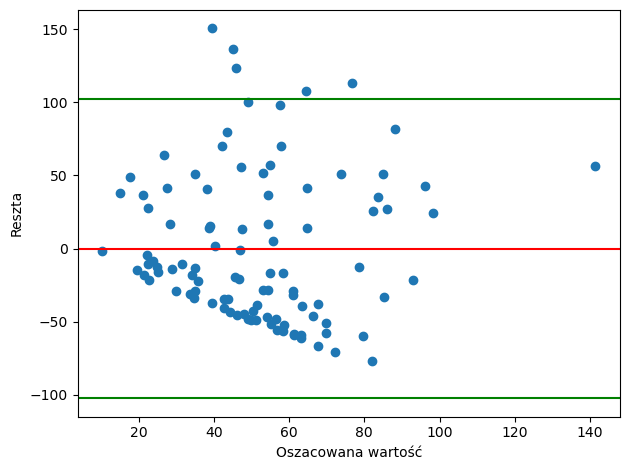

In [72]:
pt.scatter(m7.fittedvalues, m7.resid)
pt.axhline(y=0, color = 'red')
pt.axhline(y = 0 + 2*m7.resid.std(), color = 'green')
pt.axhline(y = 0 - 2*m7.resid.std(), color = 'green')
pt.xlabel('Oszacowana wartość')
pt.ylabel('Reszta')
pt.tight_layout()
#pt.savefig('homoskedastycznosc.png')
pt.show()

In [73]:
test1 = sms.diagnostic.het_breuschpagan(m7.resid, m7.model.exog)
test1
#p-value dla testu F to 4 linijka

(7.81681221951292,
 0.16662463604083075,
 1.5938436504298916,
 0.16926621877599304)

In [74]:
#p-value = 0.1693 >0.1, przyjmuje H0 o homoskedastyczności

In [75]:
test2 = sms.het_white(m7.resid, m7.model.exog)
test2

(15.506129081572528,
 0.48792737466197966,
 0.9521989916204529,
 0.5149900723993498)

In [76]:
#p-value = 0.515 >0.1, przyjmuje H0 o homoskedastyczności

In [77]:
test3 = sms.het_goldfeldquandt(m7.resid,  m7.model.exog)
test3

(1.9292639599101982, 0.015228416717422623, 'increasing')

In [78]:
#p-value = 0.015 <0.1, odrzucam H0 o homoskedastyczności, mamy heteroskedastyczność

próba naprawy heteroskedastyczności - **macierz odporna White'a**

In [79]:
m9 = smf.ols(formula = 'highest_charting_position ~ Duration +tiktok_track_popularity +  Valence * Explicit', data = df).fit(cov_type = 'HC0') #korzystamy z HC0 zawsze
m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.152
Model:                                   OLS   Adj. R-squared:                  0.108
Method:                        Least Squares   F-statistic:                     5.071
Date:                       Sun, 19 May 2024   Prob (F-statistic):           0.000365
Time:                               22:11:32   Log-Likelihood:                -540.31
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             95   BIC:                             1108.
Df Model:                                  5                                         
Covariance Type:                         HC0                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -40.7361     27.791     -1.466      0.143     -95.205      13.733
Duration                   22.1289      7.124      3.106      0.002       8.166      36.092
tiktok_track_popularity    -0.3654      0.195     -1.871      0.061      -0.748       0.017
Valence                    89.0038     26.516      3.357      0.001      37.033     140.975
Explicit                   58.9020     27.780      2.120      0.034       4.455     113.350
Valence:Explicit         -112.2173     50.010     -2.244      0.025    -210.236     -14.199
==============================================================================
Omnibus:                       11.261   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.302
Skew:                           0.854   Prob(JB):                      0.00213
Kurtosis:                       3.068   Cond. No.                         949.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [80]:
Stargazer([m7,m9]) #trzeba uwzględnić tutaj na co wpływa macierz odporna i założenie [1] Standard Errors are heteroscedasticity robust (HC0)

In [81]:
#wydruk_2 = Stargazer([m7,m9])
#wydruk_2.render_html()

In [82]:
#widzimy na powyższym przykładzie, że oszacowania parametrów w zwykłym modelu (1) oraz modelu oszacowanego za pomocą
#odpornej na heteroskedastyczność macierzy White'a (2) nie różnią się zbytnio od siebie
#na podstawie możemy wnioskować, iż występowanie heteroskedastyczności w tym modelu nie ma poważniejszego wpływu
#na wyniki regresji (ze skryptu dr Mycielskiego)

### 3. Brak autokorelacji reszt

TEST BREAUSCHA-GODFREYA

In [83]:
test_bg = sms.acorr_breusch_godfrey(m7)
test_bg

(30.512829385502283,
 0.0007058391328407469,
 3.6795213585069697,
 0.0004076986854388674)

In [84]:
#występuje autokorelacja reszt - opisać konsekwencje

### 4. Rozkład normalny reszt

graficznie

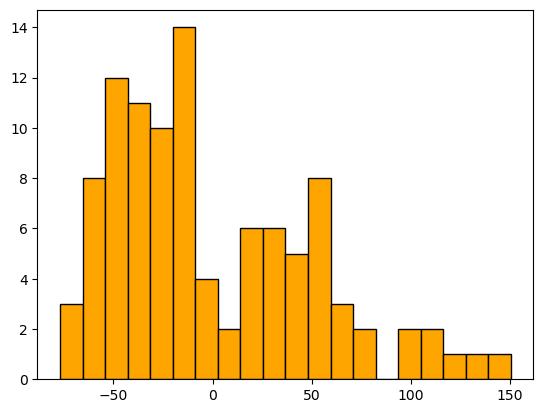

In [85]:
plt.hist(m7.resid, color = 'orange', bins = 20, edgecolor='black')
plt.show()

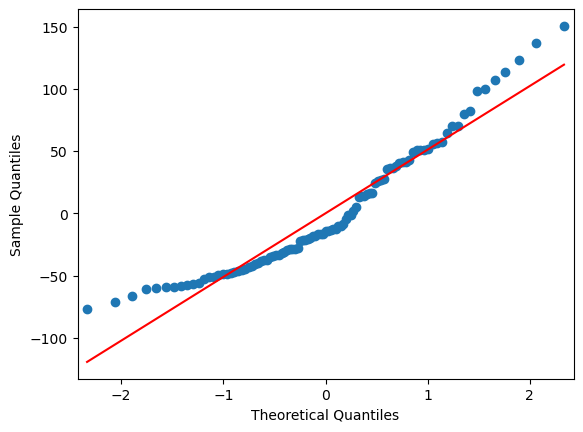

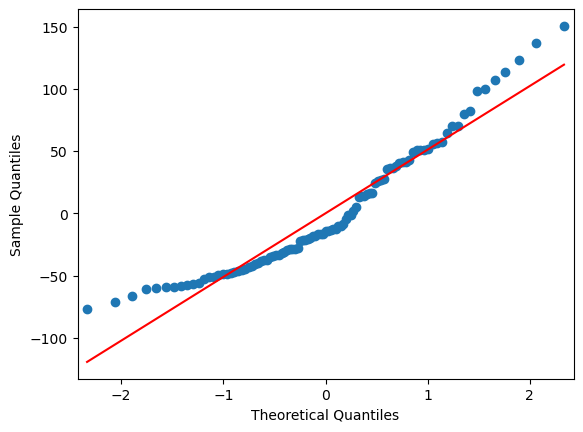

In [86]:
sm.qqplot(m7.resid, line='r') #idealnie dla rozkładu normalnego byłoby gdyby kropki pokrywały się z czerwoną linią

In [87]:
#z wykresu raczej nie jest to rozkład normalny

formalny test statystyczny

In [88]:
test = sms.jarque_bera(m7.resid)
test 

(12.302359920834771,
 0.002130965830644212,
 0.8542082171111862,
 3.0681640504540755)

In [89]:
stats.jarque_bera(m7.resid)

SignificanceResult(statistic=12.302359920834771, pvalue=0.002130965830644212)

In [90]:
#odrzucam h0 o tym, że jest to rozkład normalny

## Analiza obserwacji nietypowych

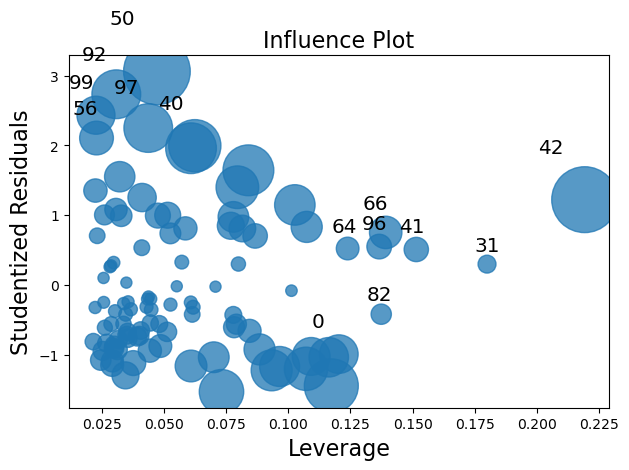

In [91]:
sm.graphics.influence_plot(m7, criterion='Cooks')
plt.tight_layout()
plt.show()
#pole koła to odległość Cooka
#jeżeli koła są duże to tym obserwacjom trzeba się przyjrzeć
#możemy je usunąć lub nie (tak jak dr wozniak mowi)

In [92]:
h_granica = 2*len(m7.params)/m7.nobs
h_granica #to jest granica dla dźwigni

0.1188118811881188

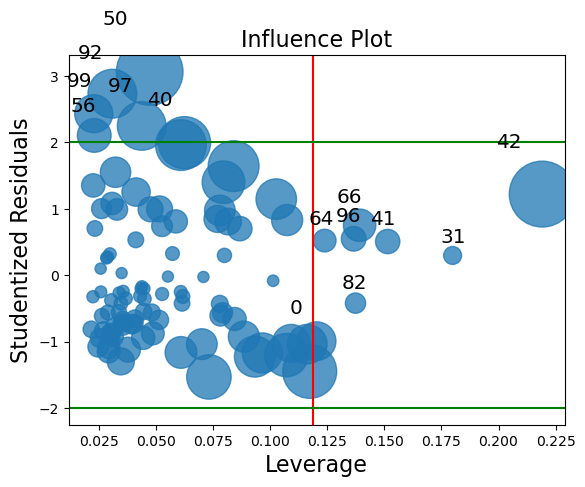

In [93]:
sm.graphics.influence_plot(m7, criterion='Cooks')
plt.axvline(x=h_granica, color='red')
plt.axhline(y=2, color = 'green')
plt.axhline(y=-2, color = 'green')
#plt.savefig('obs_odstajace.png')
plt.show() #to co jest po prawej stronie od linii czerwonej oraz poniżej/powyżej zielonej linii to obserwacje odstające, nietypowe

In [94]:
#brak obserwacji odstających

In [95]:
df['odleglosc cooka']=m7.get_influence().cooks_distance[0].round(3)

In [96]:
df[df['odleglosc cooka'] > 4/m4.nobs].sort_values(by = 'odleglosc cooka', ascending=False)

,highest_charting_position,Danceability,Energy,Loudness,log_Speechiness,log_Liveness,Duration,Valence,tiktok_track_popularity,Explicit,Duration_sq,odleglosc cooka
50,190,0.980,0.413,-11.052,-2.292635,-1.771957,3.002317,0.764,75,1,9.013905,0.071
42,198,0.668,0.727,-6.550,-3.611918,-2.302585,5.742850,0.939,78,0,32.980326,0.069
4,1,0.561,0.431,-8.810,-2.850767,-2.244316,4.033550,0.137,88,1,16.269526,0.046
40,149,0.640,0.740,-4.083,-3.561366,-1.789761,3.605333,0.785,84,1,12.998428,0.043
76,170,0.688,0.716,-5.702,-3.257097,-2.313646,4.741333,0.373,72,1,22.480242,0.041
60,156,0.515,0.479,-7.458,-3.645820,-1.655482,3.487900,0.284,85,1,12.165446,0.040


In [97]:
#odległości Cooka nie są super wysokie i tylko 6 obserwacji odstających, czyli około 6% całej populacji

## Analiza problemu współliniowości.

In [98]:
def get_vif(exogs, data):
    '''Return VIF (variance inflation factor) DataFrame

    Args:
    exogs (list): list of exogenous/independent variables
    data (DataFrame): the df storing all variables

    Returns:
    VIF and Tolerance DataFrame for each exogenous variable

    Notes:
    Assume we have a list of exogenous variable [X1, X2, X3, X4].
    To calculate the VIF and Tolerance for each variable, we regress
    each of them against other exogenous variables. For instance, the
    regression model for X3 is defined as:
                        X3 ~ X1 + X2 + X4
    And then we extract the R-squared from the model to calculate:
                    VIF = 1 / (1 - R-squared)
                    Tolerance = 1 - R-squared
    The cutoff to detect multicollinearity:
                    VIF > 10 or Tolerance < 0.1
    '''

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=data).fit().rsquared

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif


In [99]:
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     highest_charting_position   R-squared:                       0.152
Model:                                   OLS   Adj. R-squared:                  0.108
Method:                        Least Squares   F-statistic:                     3.410
Date:                       Sun, 19 May 2024   Prob (F-statistic):            0.00707
Time:                               22:11:33   Log-Likelihood:                -540.31
No. Observations:                        101   AIC:                             1093.
Df Residuals:                             95   BIC:                             1108.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -40.7361     33.120     -1.230      0.222    -106.487      25.015
Duration                   22.1289      8.126      2.723      0.008       5.997      38.260
tiktok_track_popularity    -0.3654      0.243     -1.505      0.136      -0.847       0.117
Valence                    89.0038     36.344      2.449      0.016      16.852     161.156
Explicit                   58.9020     30.871      1.908      0.059      -2.384     120.188
Valence:Explicit         -112.2173     52.979     -2.118      0.037    -217.393      -7.041
==============================================================================
Omnibus:                       11.261   Durbin-Watson:                   1.158
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.302
Skew:                           0.854   Prob(JB):                      0.00213
Kurtosis:                       3.068   Cond. No.                         949.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#brak ostrzeżenia w obszarze "Notes", to pierwsza wskazówka że może nie być tu współliniowości

In [101]:
m7.params.index

Index(['Intercept', 'Duration', 'tiktok_track_popularity', 'Valence',
       'Explicit', 'Valence:Explicit'],
      dtype='object')

In [102]:
zmienne = ['Duration', 'tiktok_track_popularity', 'Valence','Explicit']

In [103]:
get_vif(zmienne, df)

,VIF,Tolerance
Duration,1.058754,0.944507
tiktok_track_popularity,1.079353,0.926481
Valence,1.000827,0.999174
Explicit,1.020498,0.979914


In [104]:
#brak problemu współliniowości
#widzimy to także w macierzy korelacji na samym początku kodu